In [1]:
from fastai.data.all import *
from fastai.vision.all import *
import fastai
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv('ArtEmisv1.csv')
df

,art_style,painting,emotion,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10
...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8


In [69]:
def modo(x):
    if  x.value_counts()[0]>=sum(x.value_counts())*1.0 :
        return pd.Series.mode(x)
    else:
        return x.value_counts()[:3].index.tolist()

In [70]:
dfemo=df
dfemo['emotype']= dfemo.apply(emtype,axis=1)

In [71]:
dfemo=df

dfemo=dfemo.groupby(["art_style","painting"])["emotype"].agg(modo).reset_index()

dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[positive, negative, something else]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[negative, positive, something else]"
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[negative, something else]"
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[something else, negative, positive]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,"[something else, negative]"
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,"[positive, negative]"
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,"[positive, negative]"
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,"[positive, negative]"
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,"[positive, something else]"


In [73]:
t=type(dfemo.emotype[0])
dfemo=dfemo[dfemo["emotype"].apply(lambda x: type(x) !=t )].reset_index()
dfemo

,index,art_style,painting,emotype
0,22,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative
1,37,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative
2,53,Abstract_Expressionism,alexander-calder_the-dog,positive
3,64,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive
4,69,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive
...,...,...,...,...
16754,79998,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive
16755,79999,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive
16756,80006,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive
16757,80007,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive


In [74]:
dfemo = dfemo.drop('index', axis=1)
dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative
2,Abstract_Expressionism,alexander-calder_the-dog,positive
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive
...,...,...,...
16754,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive
16755,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive
16756,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive
16757,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive


In [75]:
dfemo['path']= dfemo.apply(lambda x: 'dataset\\wikiart\\'+x['art_style']+"\\"+ x['painting']+".jpg", axis=1)
dfemo

,art_style,painting,emotype,path
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
2,Abstract_Expressionism,alexander-calder_the-dog,positive,dataset\wikiart\Abstract_Expressionism\alexander-calder_the-dog.jpg
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_abstract-composition-1969-1.jpg
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_lord-of-the-rainbow-1976.jpg
...,...,...,...,...
16754,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata.jpg
16755,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono.jpg
16756,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-oshima-from-atami-beach.jpg
16757,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara.jpg


In [76]:
for i in dfemo.path:
    try:
        im=Image.open(i)
    except:
        dfemo=dfemo.drop(dfemo[dfemo.path==i].index)
dfemo

,art_style,painting,emotype,path
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
2,Abstract_Expressionism,alexander-calder_the-dog,positive,dataset\wikiart\Abstract_Expressionism\alexander-calder_the-dog.jpg
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_abstract-composition-1969-1.jpg
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_lord-of-the-rainbow-1976.jpg
...,...,...,...,...
16754,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata.jpg
16755,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono.jpg
16756,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-oshima-from-atami-beach.jpg
16757,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara.jpg


In [55]:
def emtype(x):
    if x.emotion=='sadness':
        return "negative"
    elif x.emotion=='fear':
        return "negative"
    elif x.emotion=='disgust':
        return "negative"
    elif x.emotion=='anger':
        return "negative"
    elif x.emotion=='contentment':
        return "positive"
    elif x.emotion=='awe':
        return "positive"
    elif x.emotion=='amusement':
        return "positive"
    elif x.emotion=='excitement':
        return "positive"
    else:
        return "something else"
    

In [56]:
dfemo['emotype']= dfemo.apply(emtype,axis=1)
dfemo

,art_style,painting,emotion,path,emotype
0,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,something else,dataset\wikiart\Abstract_Expressionism\aaron-siskind_gloucester-16a-1944.jpg,something else
1,Abstract_Expressionism,aaron-siskind_new-york-city-w-1-1947,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_new-york-city-w-1-1947.jpg,negative
2,Abstract_Expressionism,aaron-siskind_utah-84-1976,fear,dataset\wikiart\Abstract_Expressionism\aaron-siskind_utah-84-1976.jpg,negative
3,Abstract_Expressionism,abidin-dino_antibes-1961,something else,dataset\wikiart\Abstract_Expressionism\abidin-dino_antibes-1961.jpg,something else
4,Abstract_Expressionism,alice-baber_red-passage-1966,contentment,dataset\wikiart\Abstract_Expressionism\alice-baber_red-passage-1966.jpg,positive
...,...,...,...,...,...
9163,Ukiyo_e,utagawa-kuniyoshi_women-19,contentment,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_women-19.jpg,positive
9164,Ukiyo_e,utagawa-kuniyoshi_women-25,contentment,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_women-25.jpg,positive
9165,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,contentment,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata.jpg,positive
9166,Ukiyo_e,utagawa-toyokuni-ii_view-of-mountains-of-awa-province-from-tsurugaoka-near-kamakura,contentment,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-mountains-of-awa-province-from-tsurugaoka-near-kamakura.jpg,positive


In [77]:
imageDB=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_x=ColReader('path'),
                  get_y=ColReader('emotype'),
                  item_tfms=Resize(224,ResizeMethod.Pad, PadMode.Zeros))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


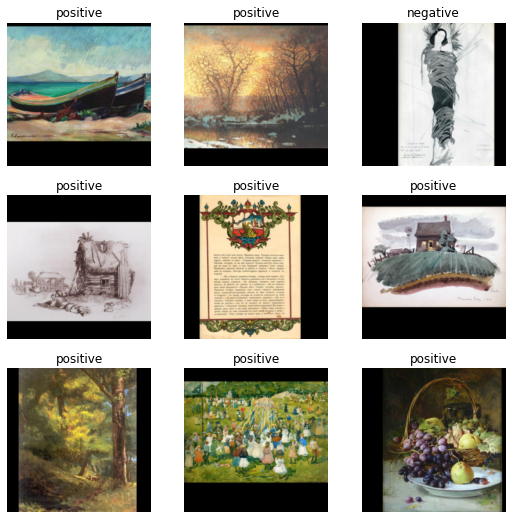

In [78]:
dls = imageDB.dataloaders(dfemo,bs=16)
dls.show_batch()

In [79]:
opt_func = partial(ranger)
model=xresnet34_deeper
learn = vision_learner(dls, model,pretrained=False, metrics=error_rate,opt_func=opt_func)

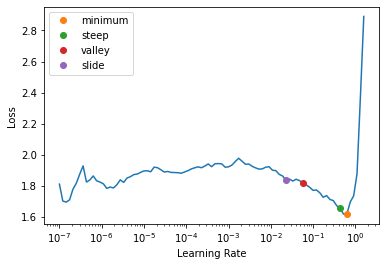

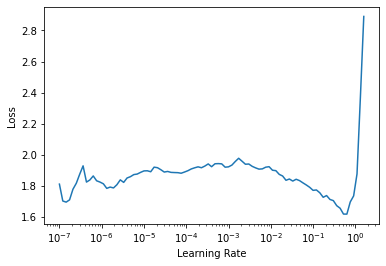

In [82]:
lr=learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
learn.recorder.plot_lr_find()

In [85]:
lr=lr[2]

In [86]:
learn.fit_flat_cos(30,lr,pct_start=0.75, cbs=[SaveModelCallback (monitor='valid_loss', 
                                                                  comp=None, 
                                                                  min_delta=0.0,
                                                                  fname='classification_model_xresnet34_deeper_refined_beforemode_tertiary', 
                                                                  every_epoch=False,
                                                                  at_end=False,
                                                                  with_opt=False, 
                                                                  reset_on_fit=True)])

epoch,train_loss,valid_loss,error_rate,time
0,0.507399,535.997925,0.148612,10:05
1,0.471615,2418.300293,0.111310,09:27
2,0.432687,0.418151,0.107729,08:46
3,0.479147,375.135101,0.191286,08:45
4,0.487870,0.384311,0.107729,08:45
5,0.358205,74.174995,0.129812,08:46
6,0.433818,0.405097,0.107729,08:46
7,0.427663,0.382636,0.108027,08:45
8,0.448272,738.657471,0.127723,08:45
9,0.430577,924.005371,0.108027,08:46


Better model found at epoch 0 with valid_loss value: 535.9979248046875.
Better model found at epoch 2 with valid_loss value: 0.41815102100372314.
Better model found at epoch 4 with valid_loss value: 0.3843114376068115.
Better model found at epoch 7 with valid_loss value: 0.3826361894607544.
Better model found at epoch 13 with valid_loss value: 0.35756856203079224.


In [87]:
model=learn.load('classification_model_xresnet34_deeper_refined_beforemode_tertiary')

C:\Users\Aren\anaconda3\envs\cupy\lib\site-packages\fastai\learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [24]:
p=model.get_preds(with_input=True)

In [28]:
len(p[2])

1833

In [29]:
p[1]

TensorBase([[1.4773e-01, 1.8630e-06, 2.3011e-01,  ..., 8.9426e-02,
             2.8920e-01, 6.6526e-02],
            [3.6129e-03, 4.3341e-08, 6.2199e-02,  ..., 2.5279e-02,
             5.8925e-02, 1.6566e-03],
            [8.8674e-02, 1.2128e-05, 2.5916e-01,  ..., 7.8524e-02,
             2.5655e-01, 3.2810e-02],
            ...,
            [2.3029e-02, 4.6319e-06, 1.8100e-01,  ..., 3.0366e-02,
             8.5108e-02, 4.2065e-03],
            [1.8372e-02, 6.4084e-06, 1.4630e-01,  ..., 3.4085e-02,
             5.2020e-02, 3.5014e-03],
            [5.2890e-01, 3.0499e-06, 6.8040e-02,  ..., 2.3041e-02,
             3.6140e-02, 5.5882e-02]])

In [37]:
for i,j in zip(p[1],p[2]):
    print("pred: "+str(torch.argmax(i).item())+' target: '+str(j.item()))

pred: 7 target: 3
pred: 3 target: 6
pred: 2 target: 3
pred: 7 target: 6
pred: 6 target: 7
pred: 3 target: 3
pred: 3 target: 2
pred: 7 target: 7
pred: 3 target: 3
pred: 2 target: 3
pred: 7 target: 0
pred: 3 target: 3
pred: 3 target: 2
pred: 3 target: 6
pred: 3 target: 6
pred: 3 target: 3
pred: 3 target: 3
pred: 0 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 0
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 2 target: 0
pred: 3 target: 3
pred: 7 target: 2
pred: 0 target: 8
pred: 6 target: 7
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 7
pred: 7 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 7 target: 6
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 3
pred: 7 target: 7
pred: 3 target: 6
pred: 8 target: 8
pred: 3 target: 3
pred: 3 target: 3
pred: 7 target: 7
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 2
pred: 6 target: 6
pred: 3 target: 3
pred: 3 target: 3
pred: 3 target: 0
pred: 3 ta

In [88]:
interp=ClassificationInterpretation(model,dls.valid,model.loss_func)

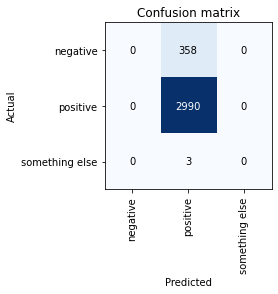

In [89]:
interp.plot_confusion_matrix()

In [90]:
interp.most_confused()

[('negative', 'positive', 358), ('something else', 'positive', 3)]

Text(0.5, 1.0, 'Histogram of Classes')

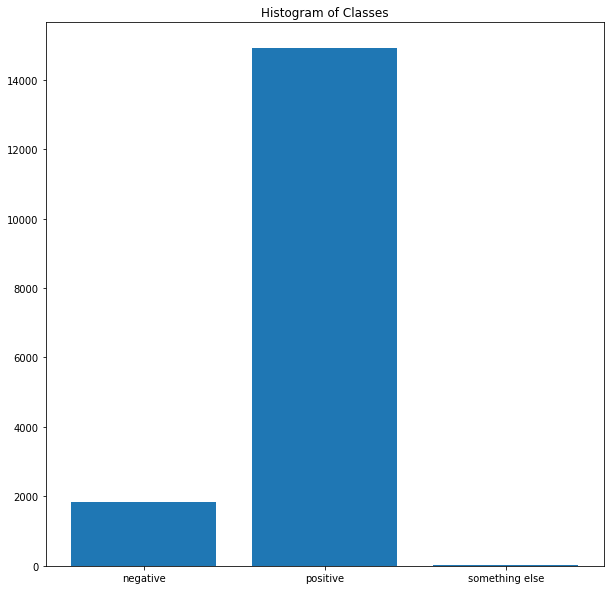

In [91]:
plt.figure(figsize=(10,10))
plt.hist(dfemo.emotype,bins=range(0,4), rwidth=0.8,align="left")
plt.title('Histogram of Classes')